# Imports

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import networkx as nx
import misc
import math
import random
import SmallBucket
import BigBucket
import RandomWarmUp1
import RandomWarmUp2
import StaticDynamic
import DcOrient

# Data Generation

In [2]:
G = misc.createRandomGraph(size=30, density=0.4, maxDegree=1000)
misc.graphInfo(G)

Chosen max degree does not fall into range (5, 16) permitted by other parameters, so picking closest value instead
Nodes: 17
Edges: 41
Density: 0.3014705882352941
Max Degree: 16
Average Degree: 4.823529411764706
Static Coloring uses 4 colors


In [3]:
updates = misc.extractUpdates(G, 'random')

In [4]:
Ge = nx.Graph()
Ge.add_nodes_from(list(G.nodes()))

# Algorithm Preparation

In [75]:
sba = SmallBucket.SmallBucketAlgo(5, Ge)
bba = BigBucket.BigBucketAlgo(5, Ge)
sda = StaticDynamic.StaticDynamicAlgo(Ge, l=5, dynamicReset=False)
wu1 = RandomWarmUp1.WarmUp1Algo(Ge, maxDegreeBound=None)
wu2 = RandomWarmUp2.WarmUp2Algo(Ge, maxDegreeBound=None)
dco = DcOrient.DcOrientAlgo(Ge)

iterator = misc.UpdateIterator(dco, updates)

full reset


# Experimenting

In [76]:
recolors = 0

while misc.verifyColoring(iterator.algo.G, iterator.algo.getColoring()):
    c1 = iterator.algo.getColoring()
    if iterator.runUpdate(1):
        c2 = iterator.algo.getColoring()
        recolors += misc.numberOfRecolors(c1, c2)
    else:
        print("all updates finished")
        break



executing CAN step for node 10
cu is set()
cnt is {}
executing CAN step for node 11
cu is set()
cnt is {0: 1}
executing CAN step for node 10
cu is set()
cnt is {}
executing CAN step for node 16
cu is set()
cnt is {0: 1}
executing CAN step for node 10
cu is set()
cnt is {}
executing CAN step for node 4
cu is set()
cnt is {0: 1}
executing CAN step for node 10
cu is set()
cnt is {}
executing CAN step for node 8
cu is set()
cnt is {0: 1}
executing CAN step for node 6
cu is set()
cnt is {}
executing CAN step for node 13
cu is set()
cnt is {0: 1}
executing CAN step for node 5
cu is set()
cnt is {}
executing CAN step for node 15
cu is set()
cnt is {0: 1}
I.cnt is {0: 1}
decreasing color 0
I.cnt is {}
I.cu is {0}
executing CAN step for node 10
cu is set()
cnt is {}
executing CAN step for node 13
cu is set()
cnt is {0: 1}
executing CAN step for node 6
cu is set()
cnt is {1: 1}
executing CAN step for node 8
cu is set()
cnt is {0: 1}
executing CAN step for node 0
cu is set()
cnt is {1: 1}
executi

# Results

In [77]:
print("Average number of recolors per update: " + str(float(recolors)/len(updates)))
print("Total number of colors used at the end: " + str(misc.numberOfColors(iterator.algo.getColoring())))

Average number of recolors per update: 1.5853658536585367
Total number of colors used at the end: 4


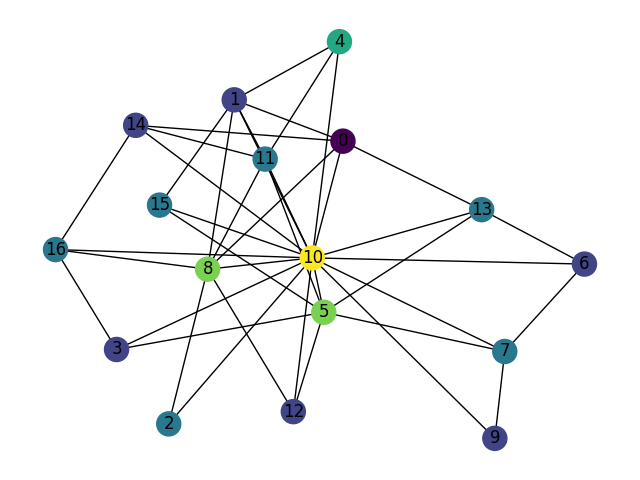

True


In [22]:
misc.draw(iterator.algo.G, iterator.algo.getColoring())
print(misc.verifyColoring(iterator.algo.G, iterator.algo.getColoring()))